In [351]:
#importing all the required lib
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [352]:
#uploaded the dataset i.e. loan.csv

In [353]:
#read the dataset
df=pd.read_csv(r"loan.csv")

In [354]:
#check the first 5 rows
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [355]:
#checking the shape of dataset
df.shape

(39717, 111)

In [356]:
#clearly 111 columns, which is huge data columns to data analysis.
#The target variable, which we want to compare across the independent variables, is loan status. 
#The strategy is to figure out compare the average default rates across various independent variables and identify the ones that affect default rate the most.

# Data Cleanup Process

In [357]:
#first find missing value check
#percentage of missing values in each column
100*df.isnull().mean()

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [358]:
# removing the columns having more than 60% missing values
null_columns = df.columns[100*(df.isnull().sum()/len(df.index)) > 60]
print(null_columns)

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [359]:
len(null_columns)

57

In [360]:
#approx 55 columns has approx 60% missing or null values which might make our analysis inaccurate, 
#so let's drop those columns from dataframe.

df=df.drop(null_columns,axis=1)

In [361]:
#let's check the shape and head again
df.shape

(39717, 54)

In [362]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [363]:
#recheck the percentage of missing values in each column
100*df.isnull().mean()

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [364]:
df.shape

(39717, 54)

In [365]:
#very few missing values now but we can ignore them.
#The data looks clean by and large. Let's also check whether all columns are in the correct format.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [367]:
extra_cols=["id",
"member_id","emp_title",
"url","zip_code","delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "pub_rec",
"initial_list_status",
    "revol_util",
     "out_prncp_inv",
    "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
"collections_12_mths_ex_med",
"policy_code",
"acc_now_delinq",
"chargeoff_within_12_mths",
"delinq_amnt",
  "application_type","pymnt_plan","desc","tax_liens","title","out_prncp"]

In [368]:
#dropping the extra columns
df=df.drop(extra_cols,axis=1)

In [369]:
df.shape

(39717, 22)

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  addr_state         

In [371]:
#check the load status possible values
df['loan_status'].unique()


array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [372]:
#Let's drop the records which are currently in process because it won't help in eith Fully paid counts or defaulter count.

loan_status_list = ['Fully Paid','Charged Off']


In [373]:
df=df[df['loan_status'].isin(loan_status_list)]
df.shape

(38577, 22)

In [374]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,addr_state,dti,open_acc,revol_bal,total_acc,total_pymnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,Dec-11,Fully Paid,credit_card,AZ,27.65,3,13648,9,5863.155187,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,Dec-11,Charged Off,car,GA,1.00,3,1687,4,1008.710000,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,Dec-11,Fully Paid,small_business,IL,8.72,2,2956,10,3005.666844,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,Dec-11,Fully Paid,other,CA,20.00,10,5598,37,12231.890000,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,...,Dec-11,Fully Paid,wedding,AZ,11.20,9,7963,12,5632.210000,0.0


In [375]:
#convert loan status data into numerical data i.e. Fully Paid = 0 and Charged Off = 1
df['loan_status']=df['loan_status'].map({'Fully Paid':0,'Charged Off':1})
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,addr_state,dti,open_acc,revol_bal,total_acc,total_pymnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,Dec-11,0,credit_card,AZ,27.65,3,13648,9,5863.155187,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,Dec-11,1,car,GA,1.00,3,1687,4,1008.710000,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,Dec-11,0,small_business,IL,8.72,2,2956,10,3005.666844,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,Dec-11,0,other,CA,20.00,10,5598,37,12231.890000,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,...,Dec-11,0,wedding,AZ,11.20,9,7963,12,5632.210000,0.0


# Data Analysis

In [376]:
#converting int_rate from string to float
df['int_rate']=df['int_rate'].str.replace('%','')

In [377]:
df['int_rate']=df['int_rate'].astype(float)

In [379]:
#let define columns into catagory and numerical columns
cat_cols=["loan_status","grade","term","emp_length","verification_status","home_ownership","sub_grade","emp_length","purpose","open_acc","pub_rec_bankruptcies"]
cont_cols=["loan_amnt","funded_amnt","funded_amnt_inv","int_rate","installment","annual_inc","dti","revol_bal","total_acc","total_pymnt"]


<Axes: xlabel='loan_status', ylabel='count'>

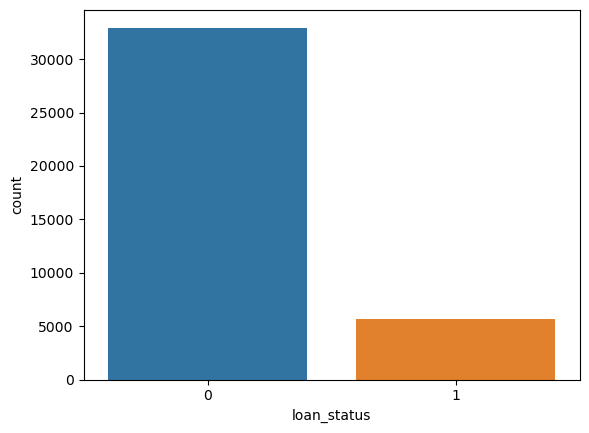

In [380]:
sns.countplot(x=df["loan_status"])

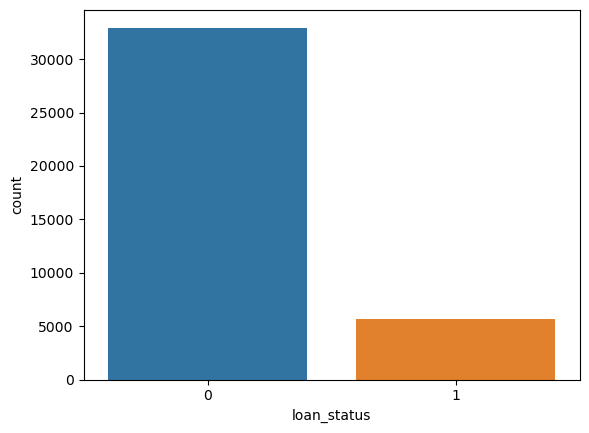

<Figure size 10000x450000 with 0 Axes>

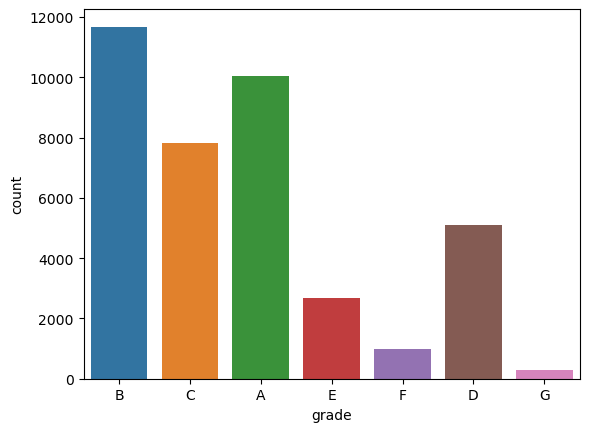

<Figure size 10000x450000 with 0 Axes>

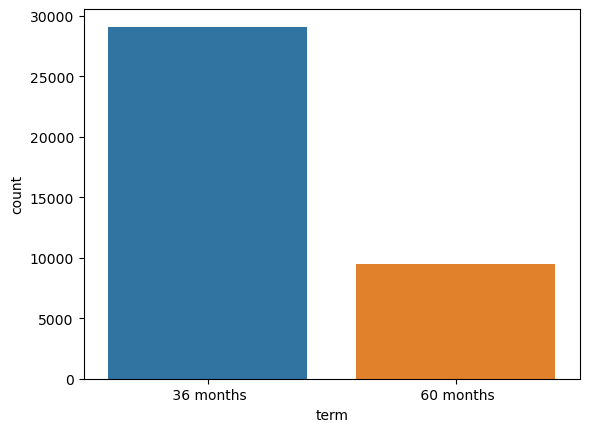

<Figure size 10000x450000 with 0 Axes>

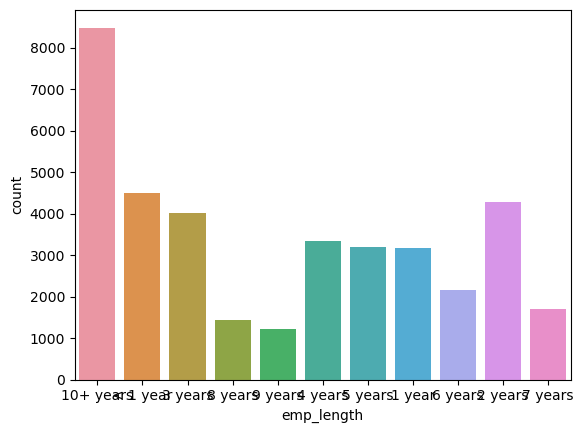

<Figure size 10000x450000 with 0 Axes>

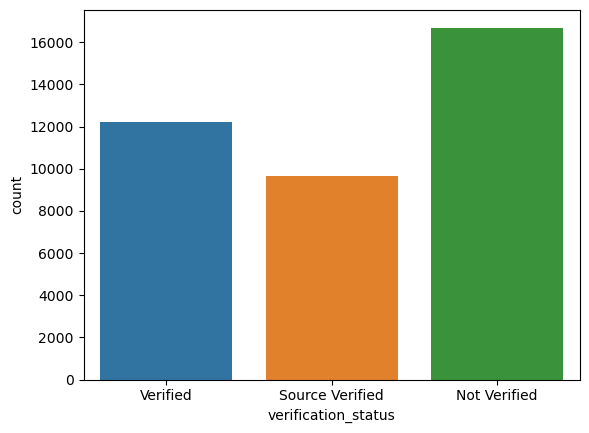

<Figure size 10000x450000 with 0 Axes>

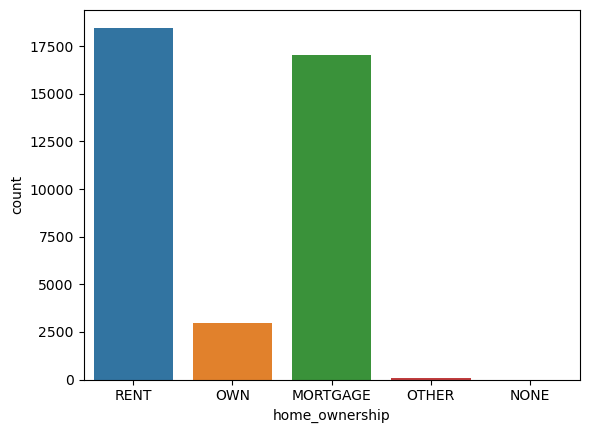

<Figure size 10000x450000 with 0 Axes>

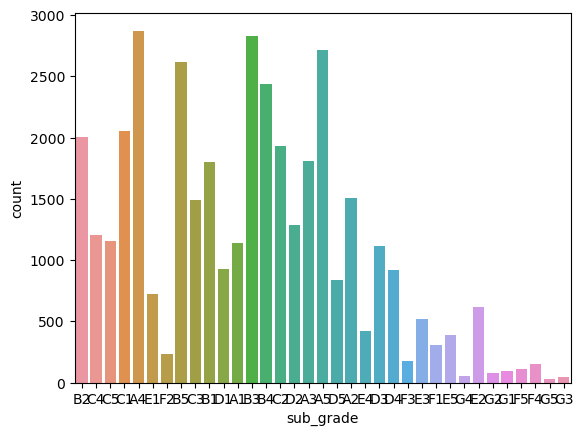

<Figure size 10000x450000 with 0 Axes>

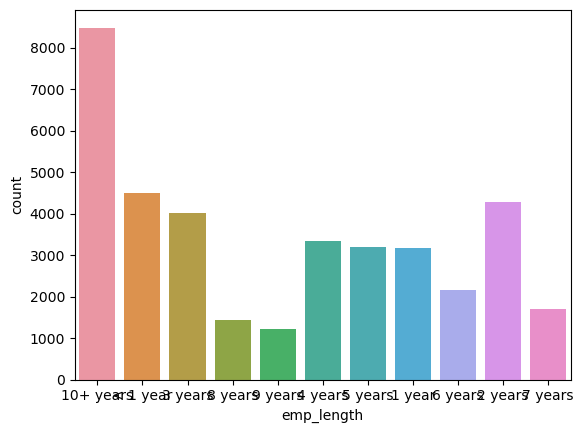

<Figure size 10000x450000 with 0 Axes>

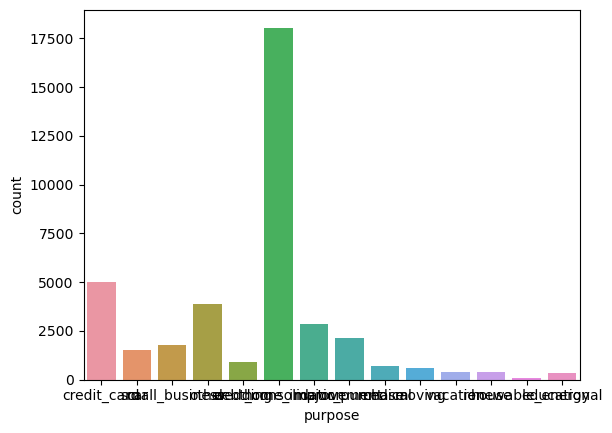

<Figure size 10000x450000 with 0 Axes>

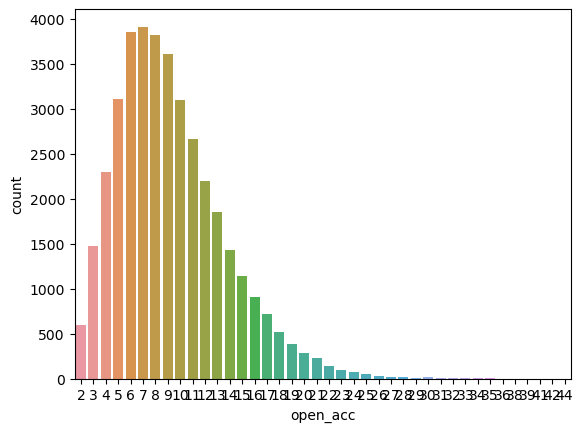

<Figure size 10000x450000 with 0 Axes>

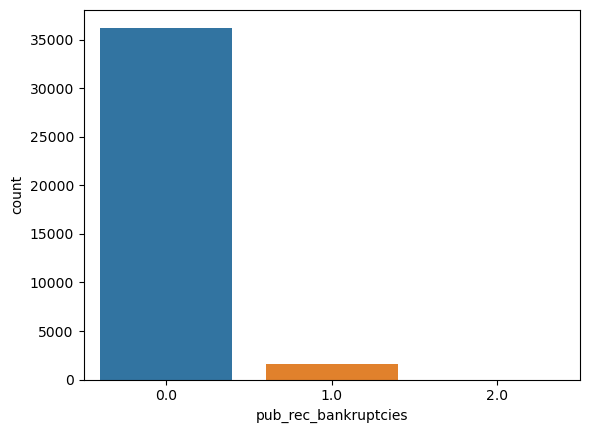

<Figure size 10000x450000 with 0 Axes>

In [381]:
for col in cat_cols:
    sns.countplot(x=df[col])
    plt.figure(figsize=(100,4500))
    plt.show()


In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  float64
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  int64  
 14  purpose               38577 non-null  object 
 15  addr_state         

In [383]:
#create new column from the existing column
df['year'] = df['issue_d'].apply(lambda x:x.split('-')[1])
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,loan_status,purpose,addr_state,dti,open_acc,revol_bal,total_acc,total_pymnt,pub_rec_bankruptcies,year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,0,credit_card,AZ,27.65,3,13648,9,5863.155187,0.0,11
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,1,car,GA,1.00,3,1687,4,1008.710000,0.0,11
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,0,small_business,IL,8.72,2,2956,10,3005.666844,0.0,11
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,0,other,CA,20.00,10,5598,37,12231.890000,0.0,11
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,0,wedding,AZ,11.20,9,7963,12,5632.210000,0.0,11


In [309]:
#dropping the extra columns
df=df.drop("year",axis=1)

In [384]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,loan_status,purpose,addr_state,dti,open_acc,revol_bal,total_acc,total_pymnt,pub_rec_bankruptcies,year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,0,credit_card,AZ,27.65,3,13648,9,5863.155187,0.0,11
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,1,car,GA,1.00,3,1687,4,1008.710000,0.0,11
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,0,small_business,IL,8.72,2,2956,10,3005.666844,0.0,11
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,0,other,CA,20.00,10,5598,37,12231.890000,0.0,11
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,0,wedding,AZ,11.20,9,7963,12,5632.210000,0.0,11


In [311]:
from datetime import datetime
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [312]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,verification_status,issue_d,loan_status,purpose,dti,open_acc,revol_bal,total_acc,total_pymnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,Verified,2011-12-01,0,credit_card,27.65,3,13648,9,5863.155187,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,Source Verified,2011-12-01,1,car,1.00,3,1687,4,1008.710000,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,Not Verified,2011-12-01,0,small_business,8.72,2,2956,10,3005.666844,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,Source Verified,2011-12-01,0,other,20.00,10,5598,37,12231.890000,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,...,Source Verified,2011-12-01,0,wedding,11.20,9,7963,12,5632.210000,0.0


## let's do the bivariate analysis

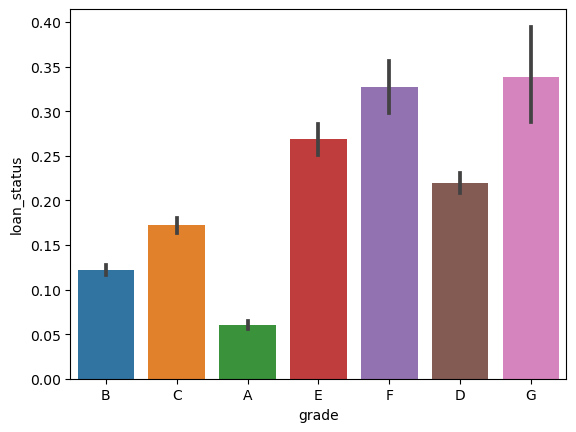

In [314]:

            sns.barplot(x=df["grade"],y=df["loan_status"])
            plt.show()

## We can clearly see that people from grade F and G are mostly defaulters

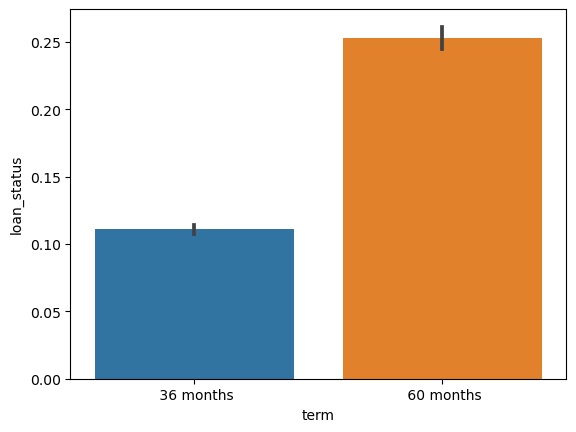

In [320]:
sns.barplot(x=df["term"],y=df["loan_status"])
plt.show()

## we can see that if the term is 60 months, people are mostly parched off

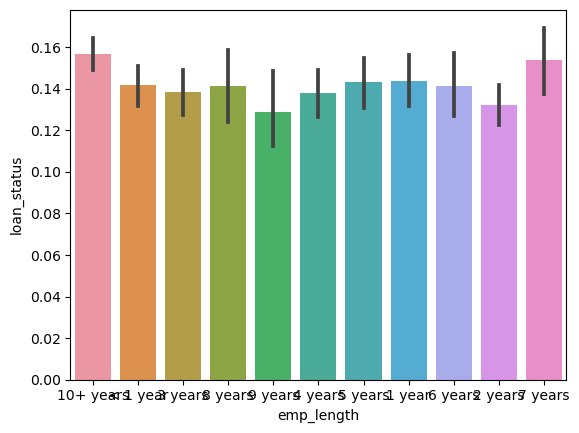

In [322]:
sns.barplot(x=df["emp_length"],y=df["loan_status"])
plt.show()

## Here the analysis doesn't give you any significant details

### Lets try to fetch emp_length in numeric format

In [391]:
#first check the null values for emp_length
df['emp_length'].isna().sum()

1033

In [392]:
##Lets discard null records
df = df[~df['emp_length'].isnull()]

In [393]:
df['emp_length'].isna().sum()

0

In [394]:
##now convert the column from String to Numeric
# using regular expression to extract numeric values from the string
import re
df['emp_length'] = df['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
df['emp_length'] = df['emp_length'].apply(lambda x: pd.to_numeric(x))

In [395]:
#let's check the column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37544 non-null  int64  
 1   funded_amnt           37544 non-null  int64  
 2   funded_amnt_inv       37544 non-null  float64
 3   term                  37544 non-null  object 
 4   int_rate              37544 non-null  float64
 5   installment           37544 non-null  float64
 6   grade                 37544 non-null  object 
 7   sub_grade             37544 non-null  object 
 8   emp_length            37544 non-null  int64  
 9   home_ownership        37544 non-null  object 
 10  annual_inc            37544 non-null  float64
 11  verification_status   37544 non-null  object 
 12  issue_d               37544 non-null  object 
 13  loan_status           37544 non-null  int64  
 14  purpose               37544 non-null  object 
 15  addr_state         

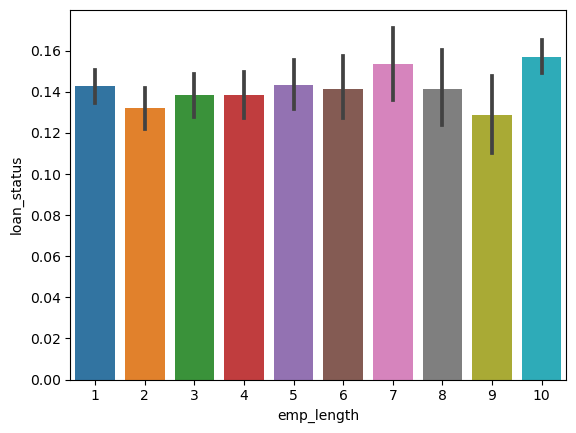

In [396]:
##lets check the graph again between loan_status and emp_length
sns.barplot(x=df["emp_length"],y=df["loan_status"])
plt.show()

## not much differentiator w.r.t emp_length

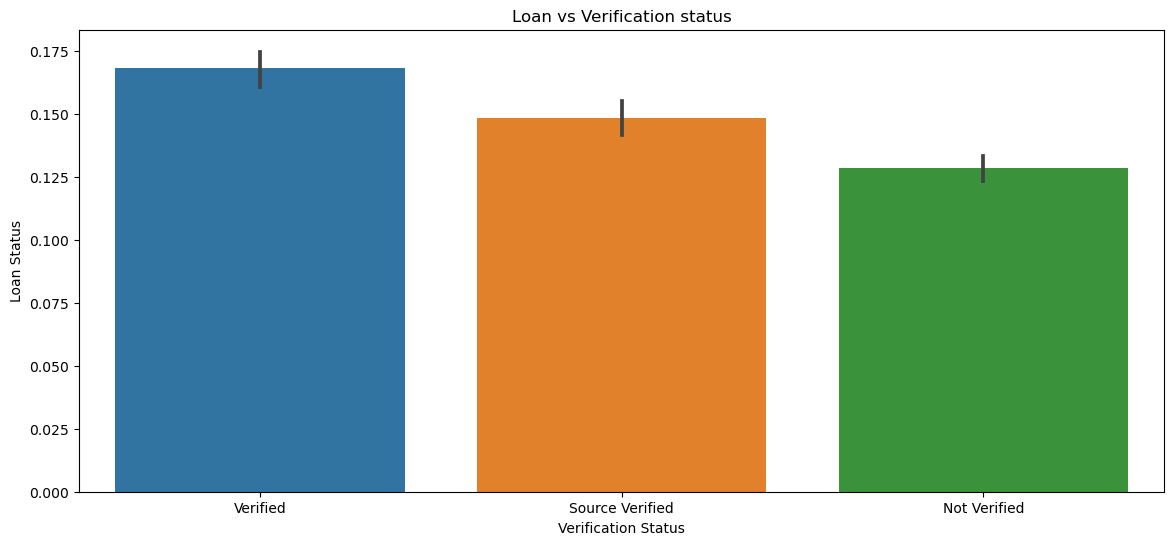

In [332]:
plt.figure(figsize=(14, 6))
sns.barplot(x=df["verification_status"],y=df["loan_status"])
plt.title('Loan vs Verification status')
plt.xlabel('Verification Status')
plt.ylabel('Loan Status')
plt.show()

## looks like verified loans are defaulted more than others

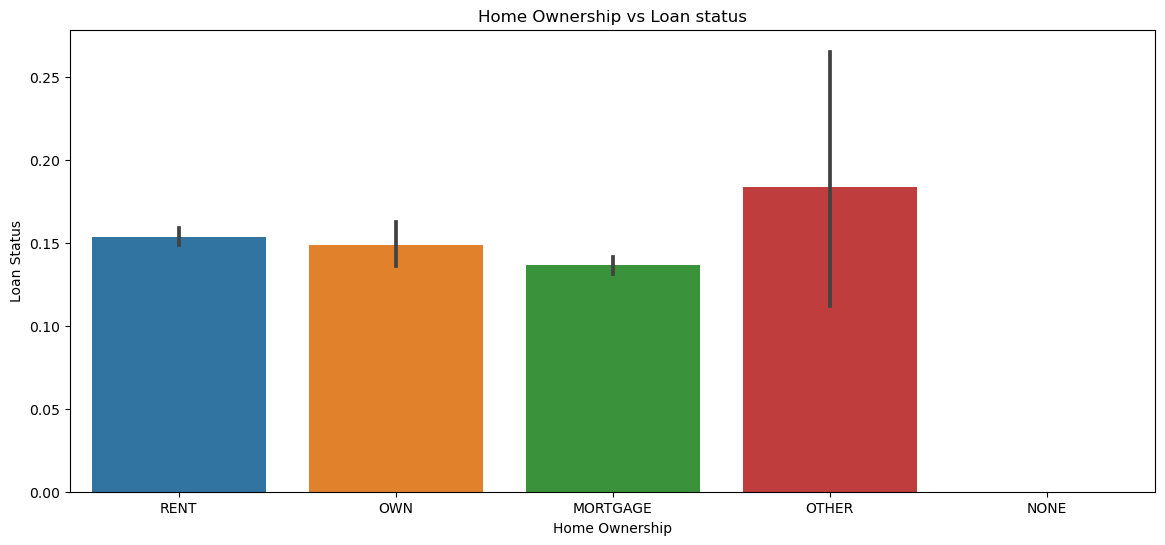

In [333]:
plt.figure(figsize=(14, 6))
sns.barplot(x=df["home_ownership"],y=df["loan_status"])
plt.title('Home Ownership vs Loan status')
plt.xlabel('Home Ownership')
plt.ylabel('Loan Status')
plt.show()

## People with Home Ownership as others defaults followed by Rent and Owner

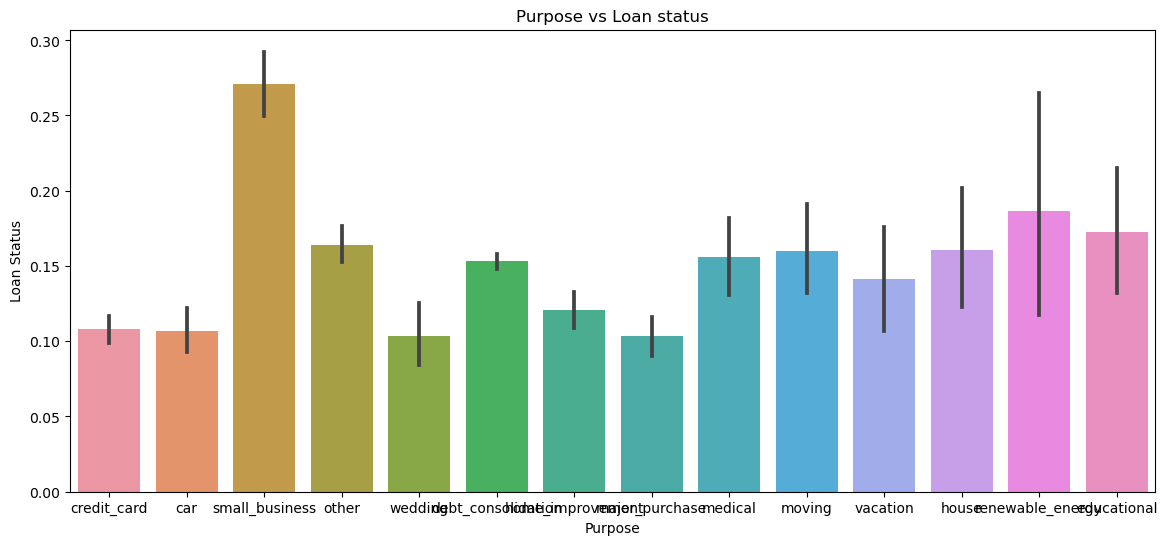

In [338]:
plt.figure(figsize=(14, 6))
sns.barplot(x=df["purpose"],y=df["loan_status"])
plt.title('Purpose vs Loan status')
plt.xlabel('Purpose')
plt.ylabel('Loan Status')
plt.show()

## clearly people who take loan for small business purpose, defaulted more and renuewable energy amd educational loans

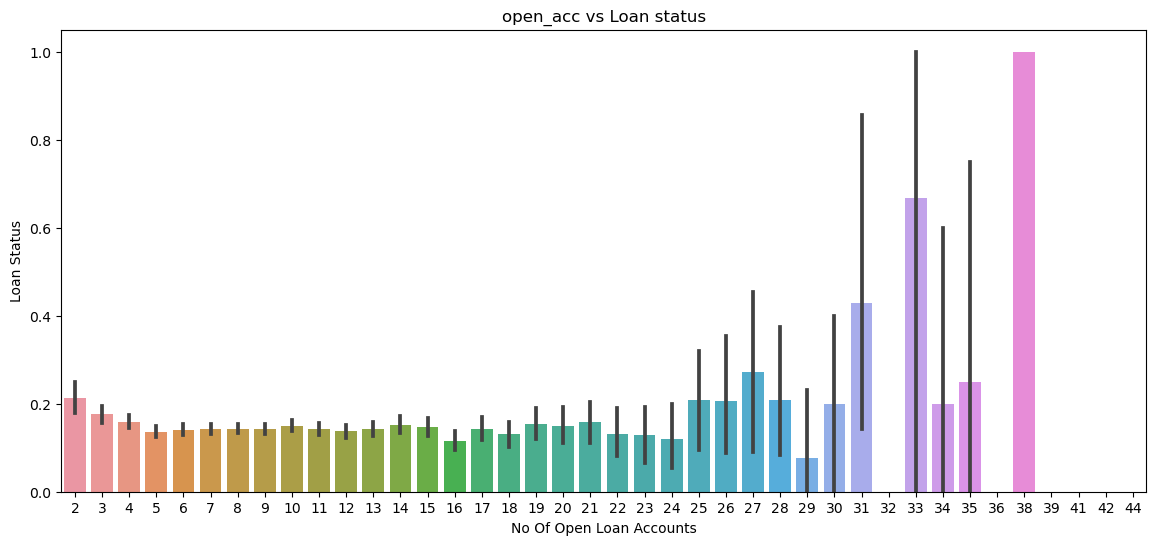

In [340]:
plt.figure(figsize=(14, 6))
sns.barplot(x=df["open_acc"],y=df["loan_status"])
plt.title('open_acc vs Loan status')
plt.xlabel('No Of Open Loan Accounts')
plt.ylabel('Loan Status')
plt.show()

## looks like people with more open credits defaults more

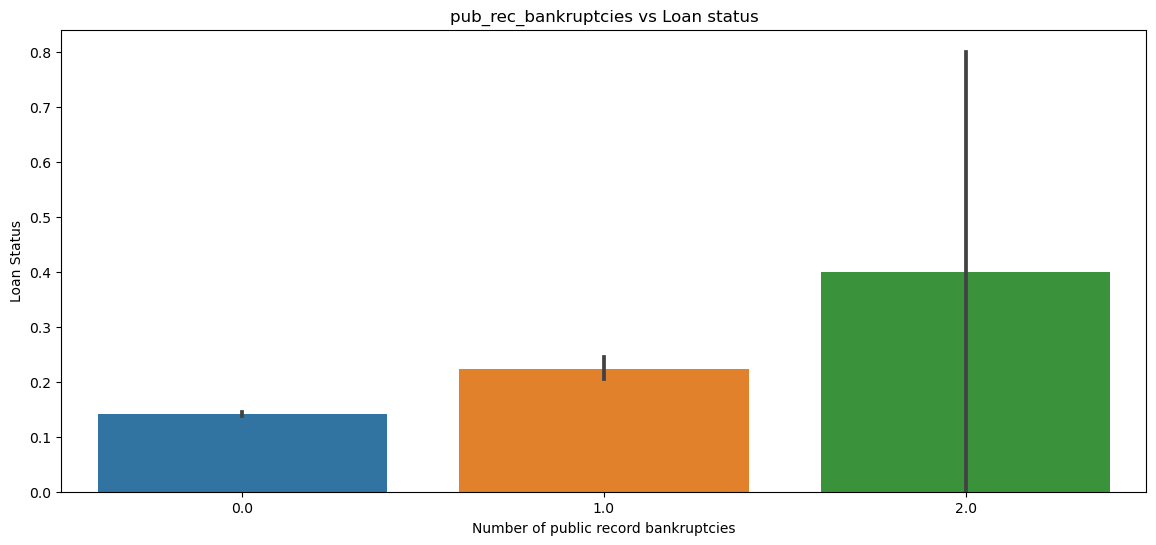

In [345]:
plt.figure(figsize=(14, 6))
sns.barplot(x=df["pub_rec_bankruptcies"],y=df["loan_status"])
plt.title('pub_rec_bankruptcies vs Loan status')
plt.xlabel('Number of public record bankruptcies')
plt.ylabel('Loan Status')
plt.show()

## more Number of public record bankruptcies do more defaults it seems

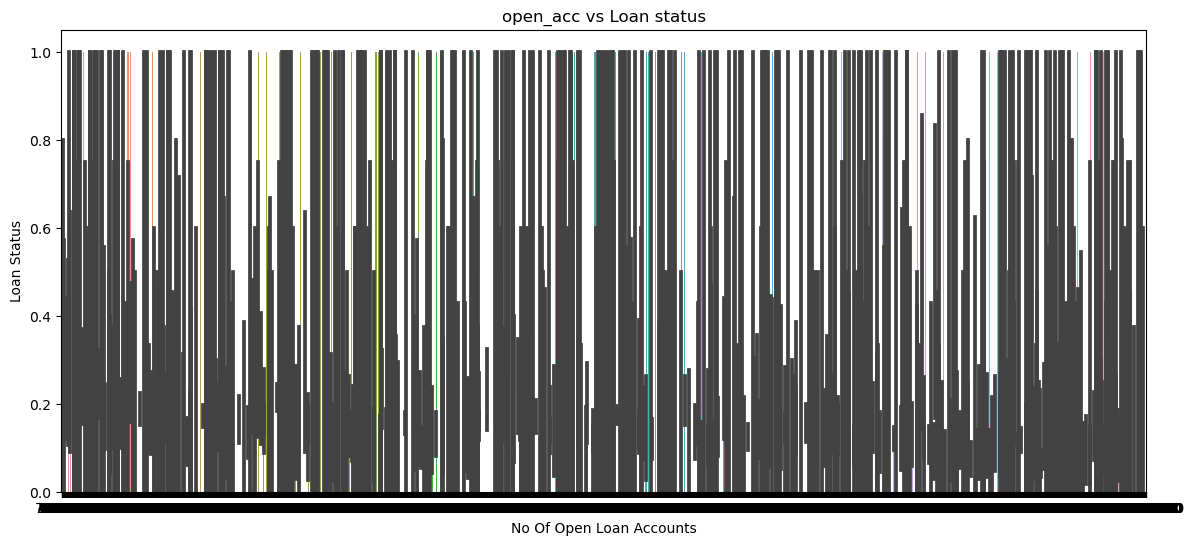

In [349]:
plt.figure(figsize=(14, 6))
sns.barplot(x=df["annual_inc"],y=df["loan_status"])
plt.title('open_acc vs Loan status')
plt.xlabel('No Of Open Loan Accounts')
plt.ylabel('Loan Status')
plt.show()

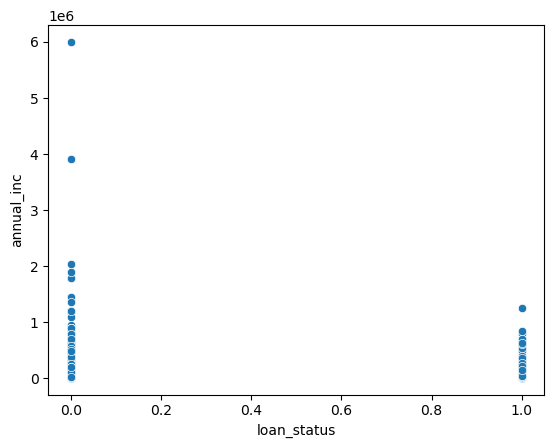

In [404]:
sns.scatterplot(y=df["annual_inc"],x=df["loan_status"])
plt.show()

## clearly our continuous column doesn't give us concrete result so let's try convert them into category.

In [389]:
df['addr_state'].value_counts()

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

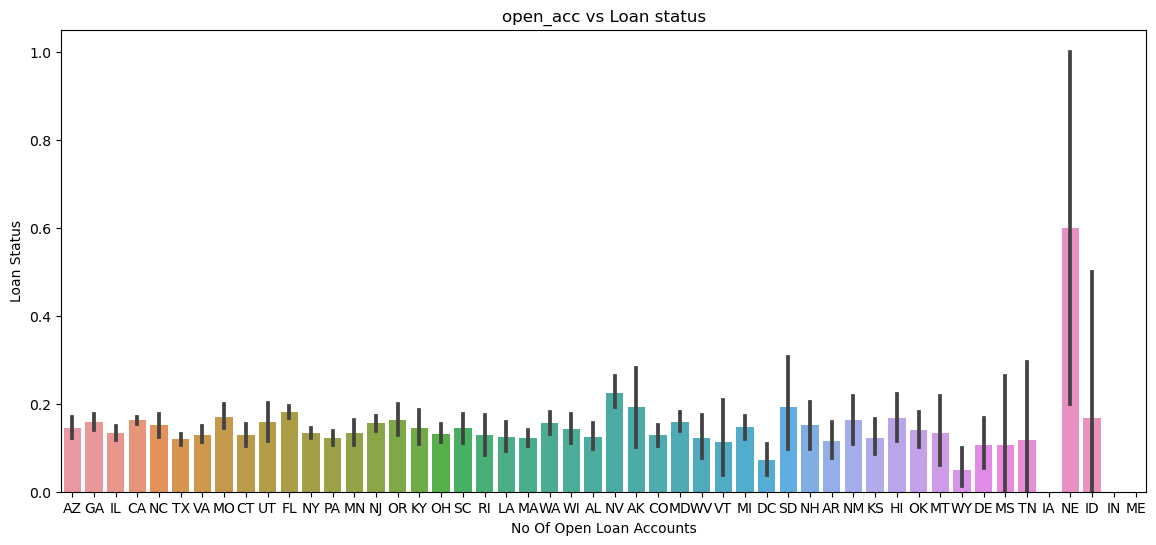

In [390]:
plt.figure(figsize=(14, 6))
sns.barplot(x=df["addr_state"],y=df["loan_status"])
plt.title('open_acc vs Loan status')
plt.xlabel('No Of Open Loan Accounts')
plt.ylabel('Loan Status')
plt.show()

## data shows that people from NE state more than other states

In [386]:
df['loan_amnt'].median()

9600.0

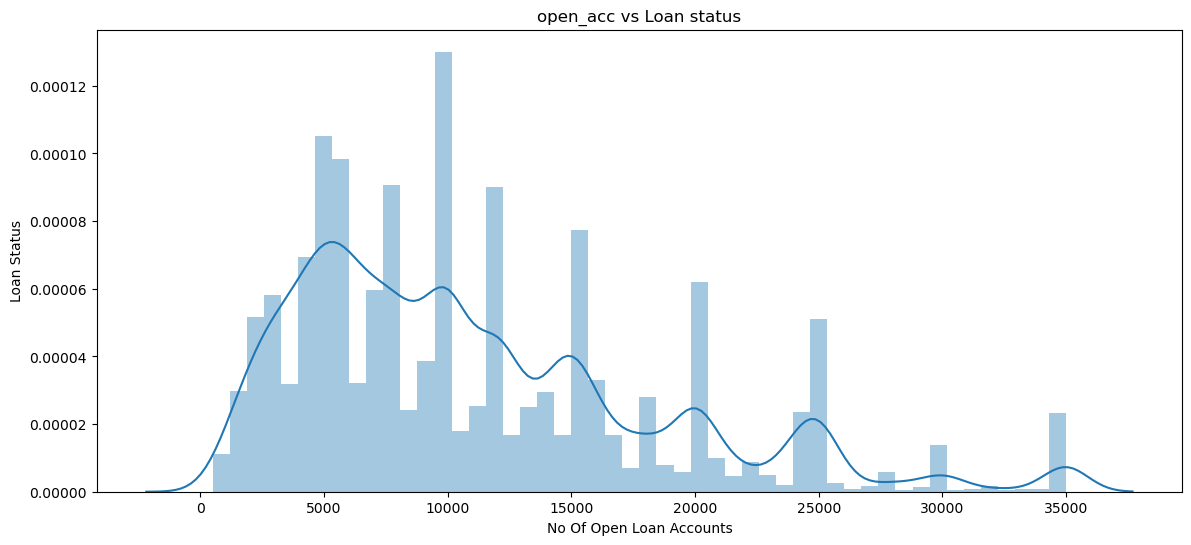

In [397]:
plt.figure(figsize=(14, 6))
sns.distplot(df["loan_amnt"])
plt.title('open_acc vs Loan status')
plt.xlabel('No Of Open Loan Accounts')
plt.ylabel('Loan Status')
plt.show()

In [387]:
df['loan_amnt'].mean()

11047.02542966016

In [398]:
## data shows that most of the loan ammpunts varies from 5000 to 20000, Let's seggregate the continuous columns into different catogories
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amount(x))

In [400]:
df['loan_amnt'].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt, dtype: int64

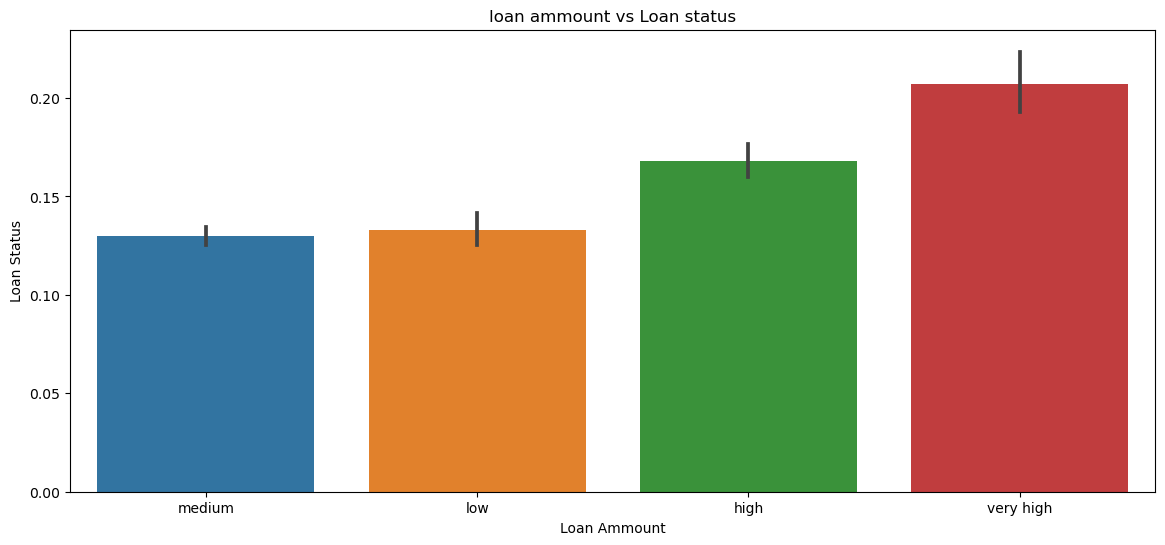

In [401]:
##Lets analysise the graph between loan_amnt and loan_status
plt.figure(figsize=(14, 6))
sns.barplot(x=df["loan_amnt"],y=df["loan_status"])
plt.title('loan ammount vs Loan status')
plt.xlabel('Loan Ammount')
plt.ylabel('Loan Status')
plt.show()

## Looks like people who took high ammount of loan or more than 25000 defaults more 

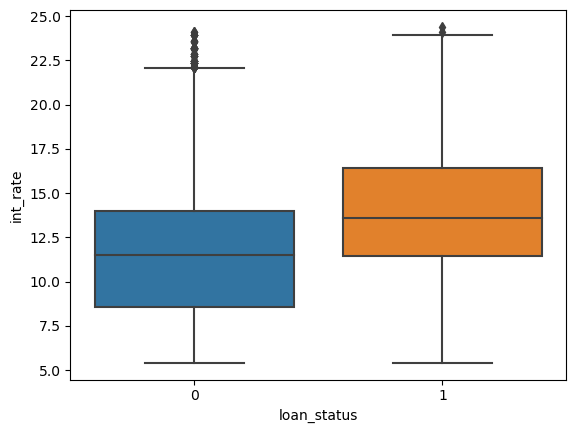

In [427]:
plt.figure(figsize=(14, 6))
sns.boxplot(y=df["int_rate"],x=df["loan_status"])
plt.show()

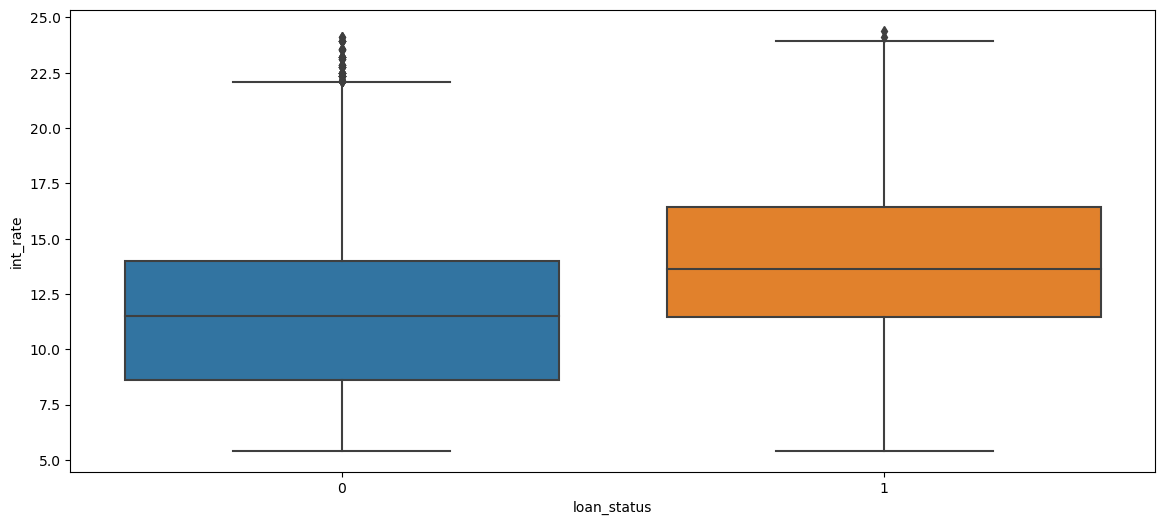

In [432]:
plt.figure(figsize=(14, 6))
sns.boxplot(y=df["int_rate"],x=df["loan_status"])
plt.show()

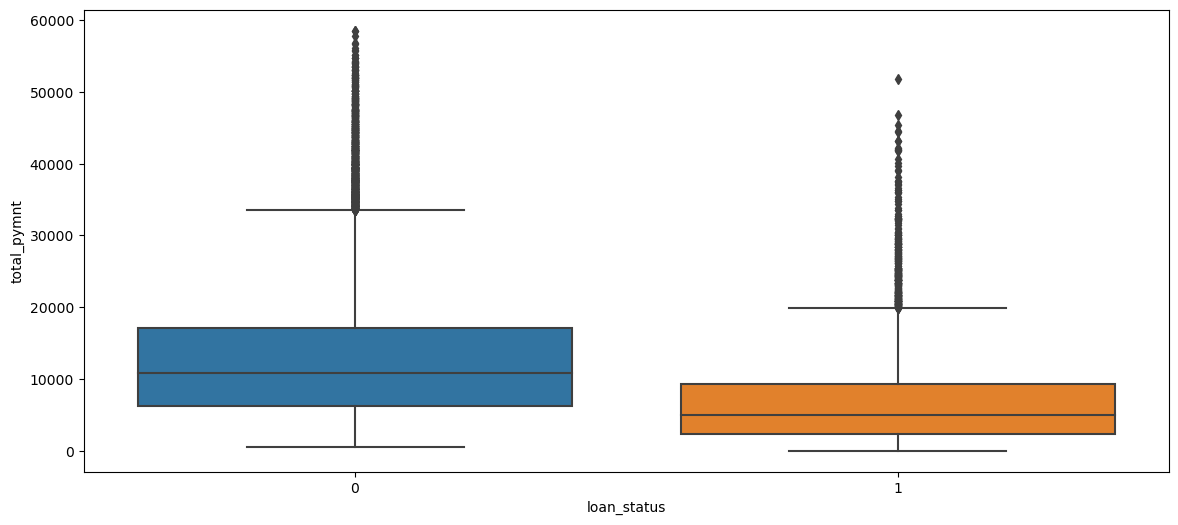

In [434]:
plt.figure(figsize=(14, 6))
sns.boxplot(y=df["total_pymnt"],x=df["loan_status"])
plt.show()

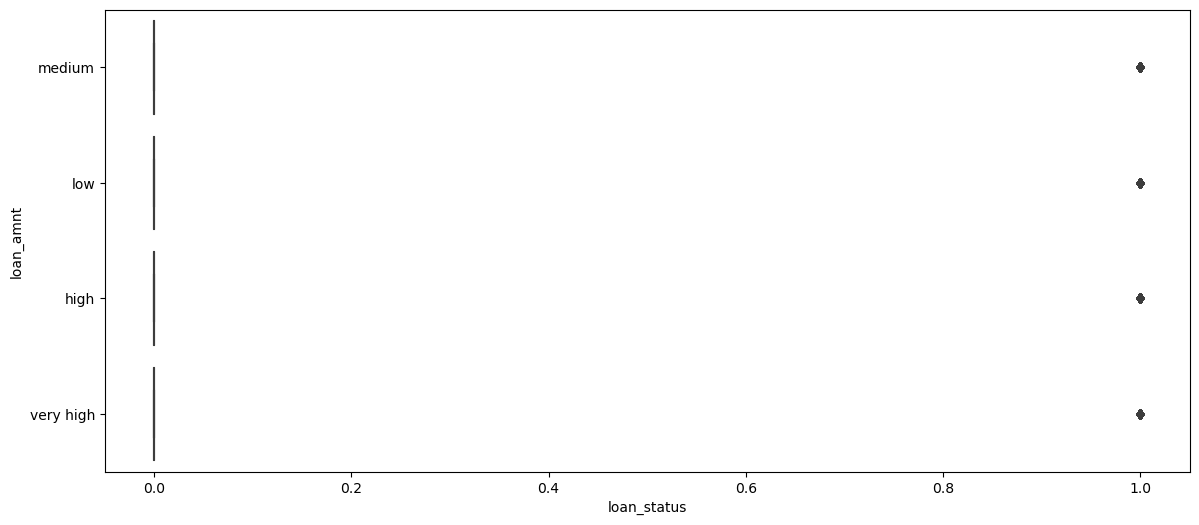

In [435]:
plt.figure(figsize=(14, 6))
sns.boxplot(y=df["loan_amnt"],x=df["loan_status"])
plt.show()

In [423]:
df['dti'].median()

13.38

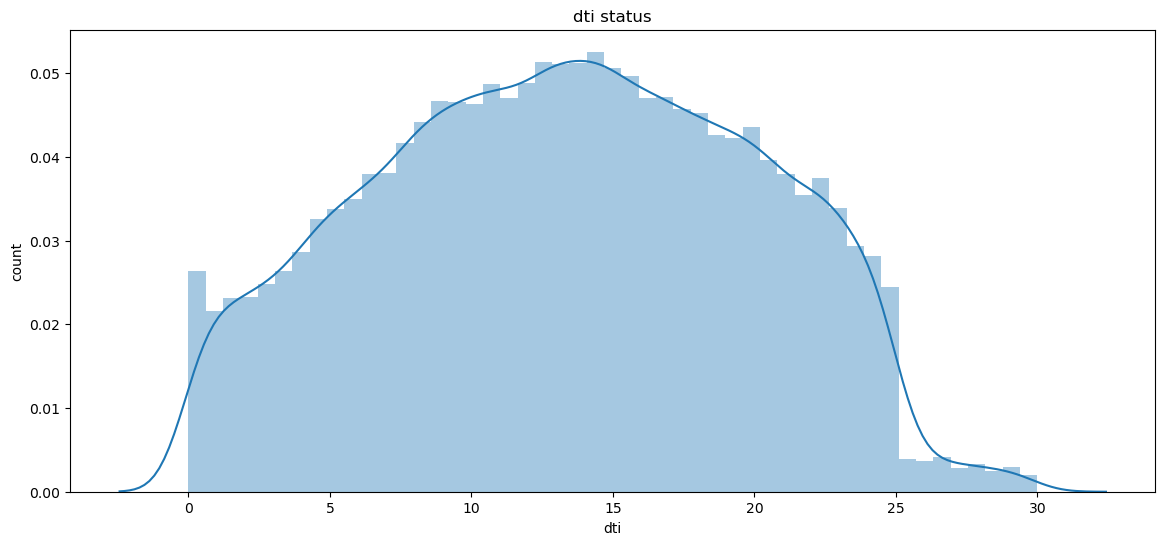

In [424]:
plt.figure(figsize=(14, 6))
sns.distplot(df["dti"])
plt.title('dti status')
plt.xlabel('dti')
plt.ylabel('count')
plt.show()

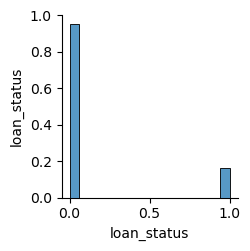

In [441]:
plt.figure(figsize=(8,5))
sns.heatmap(df.drop("Sex",axis=1).corr(),annot=True,fmt='.2f',cmap="YlOrBr")
plt.show()
